In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [65]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\gapminder.csv')

In [66]:
data.shape

(139, 10)

In [67]:
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [68]:
data.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [69]:
data.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [70]:
data.var()

population         1.199289e+16
fertility          2.609370e+00
HIV                1.943905e+01
CO2                3.929220e+01
BMI_male           4.881308e+00
GDP                3.689203e+08
BMI_female         1.999876e+01
life               8.321434e+01
child_mortality    2.090745e+03
dtype: float64

In [71]:
cols = ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'life', 'child_mortality']
data = data[cols]
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(data), columns = cols)
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,0.626793,-0.342343
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,-1.243534,3.224390
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,0.648797,-0.651826
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,0.318739,-0.550860
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,1.308913,-0.875707


In [72]:
data.var()

population         1.007246
fertility          1.007246
HIV                1.007246
CO2                1.007246
BMI_male           1.007246
GDP                1.007246
BMI_female         1.007246
life               1.007246
child_mortality    1.007246
dtype: float64

In [73]:
Corr_matrix = data.corr()

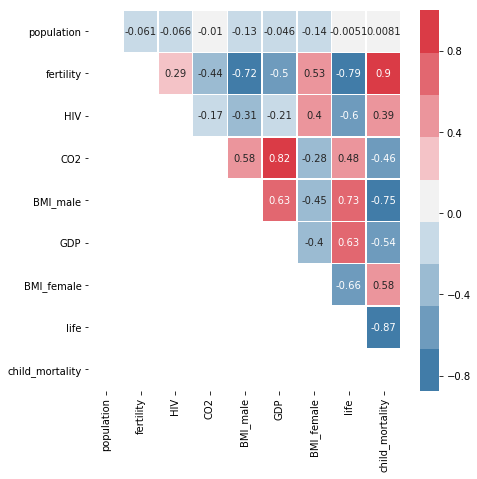

In [74]:
colormap = sns.diverging_palette(240, 10, n=9)
plt.subplots(figsize=(7, 7))
mask = np.tri(Corr_matrix.shape[0], k=0) #Masking the lower triangle
sns.heatmap(Corr_matrix, cmap=colormap, annot=True, linewidths=.5, mask=mask) 
plt.show()

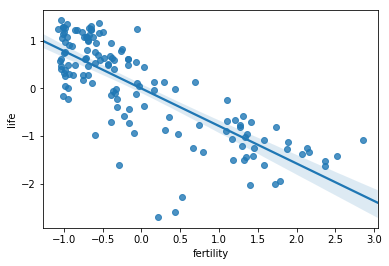

In [75]:
# Above graph shows that life and fertility are highly related but negatively. Let's try to predict life expentency by this feature
sns.regplot(data['fertility'], data['life'])
plt.show()

In [76]:
# Let's predict using Life and Fertility columns
X = pd.DataFrame(data['fertility'], columns = ['fertility'])
y = pd.DataFrame(data['life'], columns = ['life'])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print R^2 
print("Model accuracy i.e. R^2 on the trainining set is {0}".format(model.score(X_train, y_train)))

# Print R^2 
print("Model accuracy i.e. R^2 on the test set is {0}".format(model.score(X_test, y_test)))

Model accuracy i.e. R^2 on the trainining set is 0.6394568737365937
Model accuracy i.e. R^2 on the test set is 0.57197206391549


In [79]:
print("Mean Squared error i.e. the average deviation of predicted values from actual values:")
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("1) For Training set: {0}".format(train_rmse))

y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("2) For Test set: {0}".format(test_rmse))

Mean Squared error i.e. the average deviation of predicted values from actual values:
1) For Training set: 0.5977164847525053
2) For Test set: 0.6604315129273067


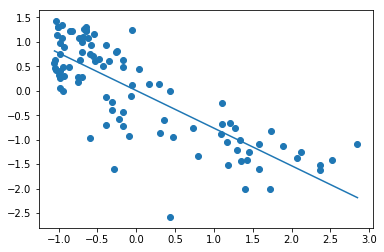

In [80]:
prediction_space = np.linspace(min(X_train['fertility']), max(X_train['fertility'])).reshape(-1,1)
y_pred = model.predict(prediction_space)
plt.scatter(X_train['fertility'], y_train['life'])
plt.plot(prediction_space, y_pred)
plt.show()

Now, trying to decrease the Mean Squared Error and model accuracy by considering all the feature set

In [81]:
X = data.drop(['life'], axis = 1)
y = pd.DataFrame(data['life'], columns = ['life'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print R^2 
print("Model accuracy i.e. R^2 on the trainining set is {0}".format(model.score(X_train, y_train)))

# Print R^2 
print("Model accuracy i.e. R^2 on the test set is {0}".format(model.score(X_test, y_test)))

Model accuracy i.e. R^2 on the trainining set is 0.8936772744420741
Model accuracy i.e. R^2 on the test set is 0.8927523903650123


It can be clearly seen that the accuracy has been inceased post considering all the features in modeling

In [84]:
print("Mean Squared error i.e. the average deviation of predicted values from actual values:")
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("1) For Training set: {0}".format(train_rmse))

y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("2) For Test set: {0}".format(test_rmse))

Mean Squared error i.e. the average deviation of predicted values from actual values:
1) For Training set: 0.3312147568213292
2) For Test set: 0.3054929126928249


Moreover, the mean squared error also has gone down

Need to do cross validation to gain the confidence that the above achieved accuracy of ~.90% will behave as good for other test sets also

In [85]:
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv = 5)
cv_scores

array([0.81720569, 0.82917058, 0.90214134, 0.80633989, 0.94495637])

In [86]:
print("Minimum accuracy that we can expect over test data is: {0}".format(min(cv_scores)))
print("Maximum accuracy that we can expect over test data is: {0}".format(max(cv_scores)))
print("However, Avg. accuracy that we can expect over test data is: {0}".format(np.mean(cv_scores)))

Minimum accuracy that we can expect over test data is: 0.8063398862588594
Maximum accuracy that we can expect over test data is: 0.9449563689078624
However, Avg. accuracy that we can expect over test data is: 0.8599627722792024


Cross Validatiion is a best way of comparing two models.

For e.g Random Forest is giving .89 accuracy
However, Knn is giving .90 accuracy

Question: Which model is good and will behave well on test set?
Solution is to use K-Fold Cross Validation, and find out the mean, Model having the greater mean can be selected for prediction.